In [1]:
#base http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#função

def natural_selection(z, t, b, c, d, e):

    x, y = z

    dxdt = x*b - x*c*y
    dydt = y*d*x - e*y

    return dxdt, dydt

In [9]:
#definindo o espaço vetorial trabalhado

y1 = np.linspace(0, 300, 60)
y2 = np.linspace(0, 300, 60)

Y1, Y2 = np.meshgrid(y1, y2)

In [4]:
#parametros
b = 2

c = 0.1

d = 0.01

e = 1

In [10]:
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = natural_selection([x, y], t,b,c,d,e)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

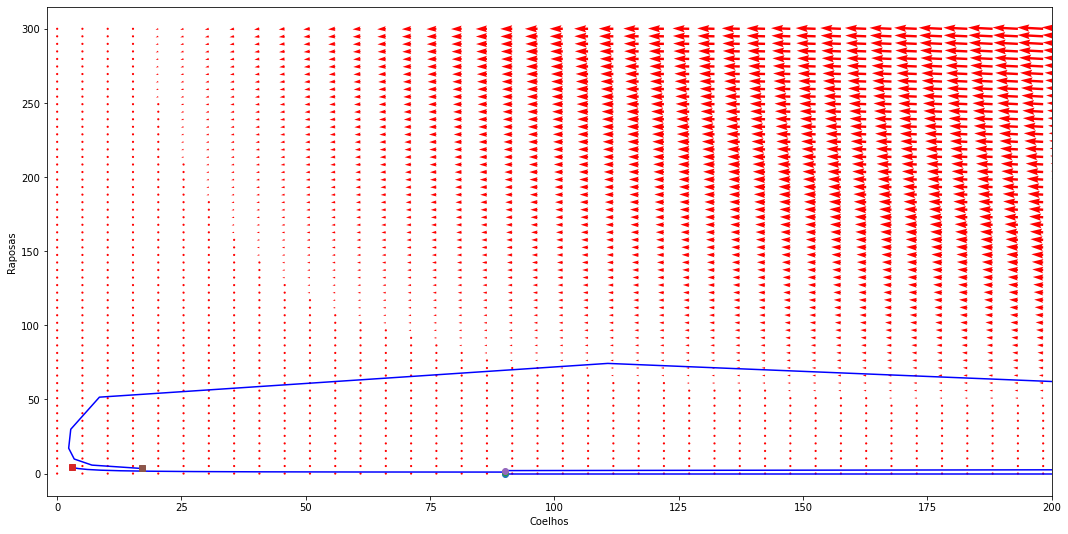

In [19]:
fig= plt.figure(figsize=(18,9))
Q = plt.quiver(Y1, Y2, u, v, color='r')  
#plt.xlabel('$y_1$') #latex?
#plt.ylabel('$y_2$')

plt.xlabel('Coelhos') #latex?
plt.ylabel('Raposas')

for y20 in np.arange(0,3,1):
    t = np.linspace(0, 60, 10)
    y0 = [90, y20]
    ys = odeint(natural_selection,y0, t, args=(b,c,d,e))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
plt.xlim([-2, 200])
plt.show()

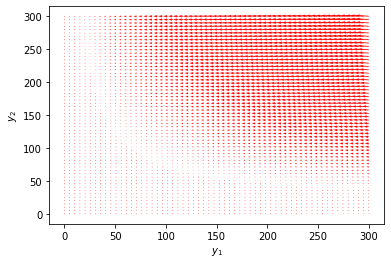

In [16]:
Q = plt.quiver(Y1, Y2, u, v, color='r')  
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.savefig('phase-portrait.png')

<Figure size 1296x1296 with 0 Axes>

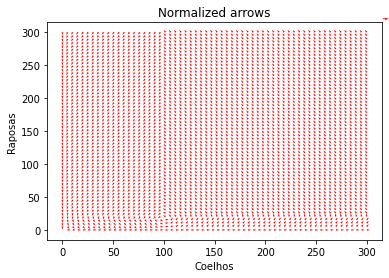

In [48]:
fig= plt.figure(figsize=(18,18))

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);

plt.figure()
plt.title('Normalized arrows')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

Q = plt.quiver(Y1, Y2, u, v, color='r', scale=None, scale_units='inches')  
#plt.xlabel('$y_1$') #latex?
#plt.ylabel('$y_2$')

plt.xlabel('Coelhos') #latex?
plt.ylabel('Raposas')
plt.savefig('phase-portrait.png')

In [49]:
#da pra ver os circulo em volta de 100 coelhos e 30 raposas